In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import openml
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import f1_score, adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, AffinityPropagation, MeanShift, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA
from joblib import Parallel, delayed
from time import time
import csv

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score, adjusted_rand_score, silhouette_score
from sklearn.model_selection import ParameterGrid
from time import time
import pandas as pd
from joblib import Parallel, delayed

import matplotlib.pyplot as plt



In [7]:
# Define the algorithms and their parameter grids
algorithms = [
    {'name': 'KMeans', 'class': KMeans, 'param_grid': {'n_clusters': [2, 3, 4], 'init': ['k-means++', 'random'], 'max_iter': [100, 300, 500]}},
    {'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    {'name': 'DBSCAN', 'class': DBSCAN, 'param_grid': {'eps': [0.5, 1.0, 1.5], 'min_samples': [3, 5, 7]}},
    {'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [3, 5, 7], 'xi': [0.01, 0.05, 0.1]}},
    {'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    {'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5], 'cluster_all': [True, False]}},
    {'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [2, 3, 4], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    {'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [2, 3, 4], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    {'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    {'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'preference': [-50, -10, -1]}}

]

In [8]:
# Define the function to run a clustering algorithm with each parameter combination
def run_algorithm(params):
    algorithm_name = params['name']
    algorithm_class = params['class']
    param_grid = params['param_grid']
    results = []
    for param_comb in ParameterGrid(param_grid):
        algorithm = algorithm_class(**param_comb)
        start_time = time()
        algorithm.fit(X)
        exec_time = time() - start_time
        if algorithm_name == 'GaussianMixture':
            labels = algorithm.predict(X)
        else:
            labels = algorithm.labels_
        if len(set(labels)) > 1: # check if there are at least 2 clusters found
            f1 = f1_score(y, labels, average='weighted')
            adj_rand = adjusted_rand_score(y, labels)
            silhouette = silhouette_score(X, labels)
            result = {'Algorithm': algorithm_name, 'Parameters': param_comb, 'F1 Score': f1, 'Adjusted Rand Score': adj_rand, 'Silhouette Score': silhouette, 'Execution Time': exec_time}
            results.append(result)
    return results


In [9]:
# Define the function to parallelize the algorithm runs
def run_parallel(algorithms):
    results = Parallel(n_jobs=-1)(delayed(run_algorithm)(params) for params in algorithms)
    results = [item for sublist in results for item in sublist]
    return results

In [4]:
# Run all the algorithms in parallel and save the results to a CSV file
#results = run_parallel(algorithms)
#results_df = pd.DataFrame(results)
#results_df.to_csv('clustering_results_iris.csv', index=False) 

In [10]:
le = LabelEncoder()
scaler = MinMaxScaler()


IRIS

In [11]:
iris = openml.datasets.get_dataset(61)
X, y, categorical_indicator, attribute_names = iris.get_data(target=iris.default_target_attribute)

In [12]:
# Convert the categorical target variable to numerical using LabelEncoder and MinMax scaling

y = le.fit_transform(y)
X = scaler.fit_transform(X)

In [14]:

# Define the algorithms and their parameter grids
algorithms = [
    {'name': 'KMeans', 'class': KMeans, 'param_grid': {'n_clusters': [2, 3, 4], 'init': ['k-means++', 'random'], 'max_iter': [100, 300, 500]}},
    {'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    {'name': 'DBSCAN', 'class': DBSCAN, 'param_grid': {'eps': [0.5, 1.0, 1.5], 'min_samples': [3, 5, 7]}},
    {'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [3, 5, 7], 'xi': [0.01, 0.05, 0.1]}},
    {'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    {'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5], 'cluster_all': [True, False]}},
    {'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [2, 3, 4], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    {'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [2, 3, 4], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    {'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    {'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'preference': [-50, -10, -1]}},


]
# Define the function to run a clustering algorithm with each parameter combination
def run_algorithm(params):
    algorithm_name = params['name']
    algorithm_class = params['class']
    param_grid = params['param_grid']
    results = []
    for param_comb in ParameterGrid(param_grid):
        algorithm = algorithm_class(**param_comb)
        start_time = time()
        algorithm.fit(X)
        exec_time = time() - start_time
        if algorithm_name == 'GaussianMixture':
            labels = algorithm.predict(X)
        else:
            labels = algorithm.labels_
        if len(set(labels)) > 1: # check if there are at least 2 clusters found
            f1 = f1_score(y, labels, average='weighted')
            adj_rand = adjusted_rand_score(y, labels)
            silhouette = silhouette_score(X, labels)
            result = {'Algorithm': algorithm_name, 'Parameters': param_comb, 'F1 Score': f1, 'Adjusted Rand Score': adj_rand, 'Silhouette Score': silhouette, 'Execution Time': exec_time}
            results.append(result)
    return results

# Define the function to parallelize the algorithm runs
def run_parallel(algorithms):
    results = Parallel(n_jobs=-1)(delayed(run_algorithm)(params) for params in algorithms)
    results = [item for sublist in results for item in sublist]
    return results
# Run all the algorithms in parallel and save the results to a CSV file
results = run_parallel(algorithms)
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results_iris.csv', index=False) 


Glass

In [19]:
glass = openml.datasets.get_dataset(41)
X, y, categorical_indicator, attribute_names = glass.get_data(target=glass.default_target_attribute)

In [20]:
# Convert the categorical target variable to numerical using LabelEncoder and MinMax scaling
X = scaler.fit_transform(X)
y = le.fit_transform(y)

In [18]:
run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results = run_parallel(algorithms)
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results_glass.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.258429,0.209236,0.520131,0.342974
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.205367,0.241745,0.525244,0.355728
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.257615,0.184371,0.360597,0.330861
3,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.258063,0.202337,0.524074,0.296937
4,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.284988,0.233520,0.526382,0.294612
...,...,...,...,...,...,...
139,AffinityPropagation,"{'damping': 0.9, 'preference': -1}",0.197355,0.184051,0.376010,0.176306
140,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.194517,0.198746,0.521353,0.015621
141,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.219883,0.219659,0.526722,0.015627
142,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.179583,0.163355,0.304983,0.007999


Wine

In [6]:
wine = openml.datasets.get_dataset(187)
X, y, categorical_indicator, attribute_names = wine.get_data(target=wine.default_target_attribute)

In [7]:
# Convert the categorical target variable to numerical using LabelEncoder and MinMax scaling
y = le.fit_transform(y)
X = scaler.fit_transform(X)

In [23]:
run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results = run_parallel(algorithms)
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results_wine.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.358678,0.370227,0.298722,0.363267
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.044320,0.853660,0.300894,0.329254
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.000000,0.750917,0.259937,0.336168
3,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.358678,0.370227,0.298722,0.318572
4,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.364228,0.868543,0.301346,0.287296
...,...,...,...,...,...,...
134,AffinityPropagation,"{'damping': 0.9, 'preference': -1}",0.119694,0.323418,0.112200,0.103678
135,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.222343,0.484739,0.296668,0.015625
136,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.023385,0.931000,0.294829,0.015626
137,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.300010,0.769743,0.248703,0.015627


Haberman

In [24]:
haberman = openml.datasets.get_dataset(43)
X, y, categorical_indicator, attribute_names = haberman.get_data(target=haberman.default_target_attribute)

In [25]:
# Convert the categorical target variable to numerical using LabelEncoder and MinMax scaling
X = scaler.fit_transform(X)
y = le.fit_transform(y)


In [39]:
# Define the algorithms and their parameter grids
algorithms = [
    {'name': 'KMeans', 'class': KMeans, 'param_grid': {'n_clusters': [2, 3, 4], 'init': ['k-means++', 'random'], 'max_iter': [100, 300, 500]}},
    {'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    {'name': 'DBSCAN', 'class': DBSCAN, 'param_grid': {'eps': [0.5, 1.0, 1.5], 'min_samples': [3, 5, 7]}},
    {'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [3, 5, 7], 'xi': [0.01, 0.05, 0.1]}},
    {'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    {'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5], 'cluster_all': [True, False]}},
    {'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [2, 3, 4], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    {'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [2, 3, 4], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    {'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'max_iter': [100, 200, 300]}},
    {'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean'], 'linkage': ['ward']}}

]
# Define the function to run a clustering algorithm with each parameter combination
def run_algorithm(params):
    algorithm_name = params['name']
    algorithm_class = params['class']
    param_grid = params['param_grid']
    results = []
    for param_comb in ParameterGrid(param_grid):
        algorithm = algorithm_class(**param_comb)
        start_time = time()
        algorithm.fit(X)
        exec_time = time() - start_time
        if algorithm_name == 'GaussianMixture':
            labels = algorithm.predict(X)
        elif algorithm_name == 'AffinityPropogation':
            labels = algorithm.fit_predict(X)
        else:
            labels = algorithm.labels_
        if len(set(labels)) > 1: # check if there are at least 2 clusters found
            f1 = f1_score(y, labels, average='weighted')
            adj_rand = adjusted_rand_score(y, labels)
            silhouette = silhouette_score(X, labels)
            result = {'Algorithm': algorithm_name, 'Parameters': param_comb, 'F1 Score': f1, 'Adjusted Rand Score': adj_rand, 'Silhouette Score': silhouette, 'Execution Time': exec_time}
            results.append(result)
    return results

# Define the function to parallelize the algorithm runs
def run_parallel(algorithms):
    results = Parallel(n_jobs=-1)(delayed(run_algorithm)(params) for params in algorithms)
    results = [item for sublist in results for item in sublist]
    return results

In [40]:
run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results = run_parallel(algorithms)
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results_haberman.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.535175,-0.003979,0.386881,0.315294
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.497758,-0.000244,0.334772,0.312081
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.304640,-0.003318,0.292412,0.304084
3,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.521641,-0.003979,0.386881,0.251553
4,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.374317,-0.000244,0.334772,0.232062
...,...,...,...,...,...,...
124,AffinityPropagation,"{'damping': 0.9, 'max_iter': 300}",0.513106,-0.006867,0.380452,0.232149
125,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.581446,-0.002130,0.322948,0.016006
126,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.458133,-0.003618,0.212171,0.008001
127,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.406021,0.004170,0.235082,0.016000


In [26]:
DBScan=[ {'name': 'DBSCAN', 'class': DBSCAN, 'param_grid': {'eps': [0.5, 1.0, 1.5]}} ]

run_parallel(DBScan)

# Run all the algorithms in parallel and save the results to a CSV file
results_df= pd.read_csv("clustering_results_haberman.csv")
resultsDB = run_parallel(DBScan)
#DB_df=pd.DataFrame(resultsDB)
#resultsdf=pd.concat([results_df, DB_df], ignore_index=True)

In [27]:
resultsDB

[]

Libras_Move

In [41]:
libras = openml.datasets.get_dataset(299)
X, y, categorical_indicator, attribute_names = libras.get_data(target=libras.default_target_attribute)

In [45]:
# Convert the categorical target variable to numerical using LabelEncoder and MinMax scaling
X = scaler.fit_transform(X)
y = le.fit_transform(y)

In [54]:
algorithms = [
    {'name': 'KMeans', 'class': KMeans, 'param_grid': {'n_clusters': [2, 3, 4], 'init': ['k-means++', 'random'], 'max_iter': [100, 300, 500]}},
    {'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    {'name': 'DBSCAN', 'class': DBSCAN, 'param_grid': {'eps': [0.5, 1.0, 1.5], 'min_samples': [3, 5, 7]}},
    {'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [3, 5, 7], 'xi': [0.01, 0.05, 0.1]}},
    {'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    {'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5], 'cluster_all': [True, False]}},
    {'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [2, 3, 4], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    {'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [2, 3, 4], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    #{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'max_iter': [100, 200, 300]}},
    {'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean'], 'linkage': ['ward']}}

]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results = run_parallel(algorithms)
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results_libras.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.016749,0.066410,0.215113,0.390684
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.018033,0.059373,0.173988,0.389390
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.022245,0.123315,0.184316,0.343802
3,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.017034,0.066362,0.212546,0.328545
4,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.025053,0.054719,0.173943,0.312544
...,...,...,...,...,...,...
146,Birch,"{'branching_factor': 100, 'n_clusters': 4, 'th...",0.036311,0.091936,0.144812,0.015626
147,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.015034,0.030265,0.192945,0.015630
148,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.019935,0.098010,0.156322,0.015626
149,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.032099,0.126391,0.168676,0.031254


In [58]:
Affinity=[{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'max_iter': [100, 200, 300]}}]

run_parallel(Affinity)

# Run all the algorithms in parallel and save the results to a CSV file
resultsaffinity = run_parallel(Affinity)
affinity_df=pd.DataFrame(resultsaffinity)
resultsdf=pd.concat([results_df, affinity_df], ignore_index=True)

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.016749,0.066410,0.215113,0.390684
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.018033,0.059373,0.173988,0.389390
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.022245,0.123315,0.184316,0.343802
3,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.017034,0.066362,0.212546,0.328545
4,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.025053,0.054719,0.173943,0.312544
...,...,...,...,...,...,...
146,Birch,"{'branching_factor': 100, 'n_clusters': 4, 'th...",0.036311,0.091936,0.144812,0.015626
147,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.015034,0.030265,0.192945,0.015630
148,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.019935,0.098010,0.156322,0.015626
149,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.032099,0.126391,0.168676,0.031254


In [59]:
resultsdf.to_csv('clustering_results_libras.csv', index=False) 
resultsdf

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.016749,0.066410,0.215113,0.390684
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.018033,0.059373,0.173988,0.389390
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.022245,0.123315,0.184316,0.343802
3,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.017034,0.066362,0.212546,0.328545
4,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.025053,0.054719,0.173943,0.312544
...,...,...,...,...,...,...
155,AffinityPropagation,"{'damping': 0.7, 'max_iter': 200}",0.025766,0.285203,0.244562,0.899287
156,AffinityPropagation,"{'damping': 0.7, 'max_iter': 300}",0.025766,0.286299,0.243310,0.667682
157,AffinityPropagation,"{'damping': 0.9, 'max_iter': 100}",0.027927,0.252278,0.212953,0.861762
158,AffinityPropagation,"{'damping': 0.9, 'max_iter': 200}",0.028117,0.291664,0.245192,1.310911


Satelite_image

In [25]:
satelite = openml.datasets.get_dataset(294)
X, y, categorical_indicator, attribute_names = satelite.get_data(target=satelite.default_target_attribute)
X = scaler.fit_transform(X)
y = le.fit_transform(y)

In [9]:
algorithms = [
    {'name': 'KMeans', 'class': KMeans, 'param_grid': {'n_clusters': [2, 3, 4], 'init': ['k-means++', 'random'], 'max_iter': [100, 300, 500]}},
    {'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    {'name': 'DBSCAN', 'class': DBSCAN, 'param_grid': {'eps': [0.5, 1.0, 1.5], 'min_samples': [3, 5, 7]}}
]
run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results = run_parallel(algorithms)
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results_satelite.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.136533,0.184602,0.367856,0.388788
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.109159,0.281667,0.432119,0.437569
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.207356,0.443511,0.402802,0.500073
3,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.056367,0.184602,0.367856,0.374242
4,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.109159,0.281667,0.432119,0.469654
5,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.011304,0.443511,0.402802,0.528537
6,KMeans,"{'init': 'k-means++', 'max_iter': 500, 'n_clus...",0.056367,0.184602,0.367856,0.359430
7,KMeans,"{'init': 'k-means++', 'max_iter': 500, 'n_clus...",0.109159,0.281667,0.432119,0.498281
8,KMeans,"{'init': 'k-means++', 'max_iter': 500, 'n_clus...",0.045925,0.443511,0.402802,0.680606
9,KMeans,"{'init': 'random', 'max_iter': 100, 'n_cluster...",0.056367,0.184602,0.367856,0.328176


In [ ]:
algorithms = [
    {'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [3, 5, 7], 'xi': [0.01, 0.05, 0.1]}},
    {'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    {'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [2, 3, 4], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    {'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [2, 3, 4], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    {'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean'], 'linkage': ['ward']}},
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results_test = run_parallel(algorithms)
results_df_test = pd.DataFrame(results_test)


In [51]:
results_df_test

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.022107,0.262923,0.310767,6.821466
1,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.146997,0.335557,0.374293,6.741825
2,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.043100,0.486306,0.362385,6.820058
3,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.292215,0.623345,0.335602,6.634841


In [26]:
# scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.
pca = PCA(0.95)
X=pca.fit_transform(X)
X

array([[-1.38546285e+00,  3.15212051e-01, -2.03353320e-01,
         3.05751651e-01,  2.79926969e-01,  3.27740775e-01],
       [-1.00791884e+00,  6.11916982e-02, -1.29434637e-01,
         1.89813161e-01,  1.15371401e-01,  2.08666450e-01],
       [-8.31994656e-01, -7.08427881e-02, -1.56961909e-01,
         6.96479409e-02,  1.52330485e-02,  5.42063594e-02],
       ...,
       [ 5.38836440e-01, -9.53784223e-02,  1.97612016e-01,
         2.70284815e-01,  3.75585343e-02, -1.86945185e-02],
       [ 4.72634397e-01, -6.48392411e-02,  1.76577088e-01,
         1.13539803e-01, -3.06108162e-02, -1.85579073e-01],
       [ 4.42939706e-01,  1.80036386e-01,  1.09638989e-01,
         1.11899584e-01,  6.61162942e-04, -2.40829633e-01]])

In [27]:
print(pca.n_components_)

6


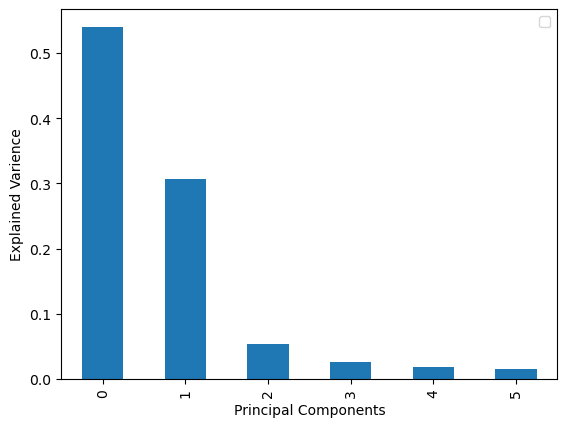

In [28]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');


In [32]:
algorithms = [
    {'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5]}},
    {'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'preference': [-50, -10, -1]}}
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results_test = run_parallel(algorithms)
results_df_test = pd.DataFrame(results_test)


In [33]:
results_df_test

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,AffinityPropagation,"{'damping': 0.5, 'preference': -50}",0.000311,0.001335,0.005104,487.594436
1,AffinityPropagation,"{'damping': 0.5, 'preference': -10}",0.008702,0.232538,0.206281,467.645122
2,AffinityPropagation,"{'damping': 0.5, 'preference': -1}",0.000827,0.076642,0.179359,145.299553
3,AffinityPropagation,"{'damping': 0.7, 'preference': -50}",0.166415,0.382695,0.282268,315.535457
4,AffinityPropagation,"{'damping': 0.7, 'preference': -10}",0.000579,0.256971,0.231458,236.383927
5,AffinityPropagation,"{'damping': 0.7, 'preference': -1}",0.000251,0.073538,0.178563,128.253302
6,AffinityPropagation,"{'damping': 0.9, 'preference': -50}",0.011909,0.431869,0.332861,128.498299
7,AffinityPropagation,"{'damping': 0.9, 'preference': -10}",0.008729,0.260031,0.234291,158.829413
8,AffinityPropagation,"{'damping': 0.9, 'preference': -1}",0.034414,0.077047,0.185394,277.685455


In [34]:
#results_df=pd.read_csv('clustering_results_satelite.csv')
results_df=pd.concat([results_df, results_df_test], ignore_index=True)
results_df.to_csv('clustering_results_satelite.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.136533,0.184602,0.367856,0.388788
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.109159,0.281667,0.432119,0.437569
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.207356,0.443511,0.402802,0.500073
3,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.056367,0.184602,0.367856,0.374242
4,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.109159,0.281667,0.432119,0.469654
...,...,...,...,...,...,...
144,AffinityPropagation,"{'damping': 0.7, 'preference': -10}",0.000579,0.256971,0.231458,236.383927
145,AffinityPropagation,"{'damping': 0.7, 'preference': -1}",0.000251,0.073538,0.178563,128.253302
146,AffinityPropagation,"{'damping': 0.9, 'preference': -50}",0.011909,0.431869,0.332861,128.498299
147,AffinityPropagation,"{'damping': 0.9, 'preference': -10}",0.008729,0.260031,0.234291,158.829413


isolet

In [8]:
isolet = openml.datasets.get_dataset(300)
X, y, categorical_indicator, attribute_names = isolet.get_data(target=isolet.default_target_attribute)
X = scaler.fit_transform(X)
y = le.fit_transform(y)

In [10]:
y

array([ 0,  0, 11, ..., 17, 18, 18])

In [7]:
algorithms = [
    {'name': 'KMeans', 'class': KMeans, 'param_grid': {'n_clusters': [10,20,30,35], 'init': ['k-means++', 'random'], 'max_iter': [100, 300, 500]}},
    {'name': 'DBSCAN', 'class': DBSCAN, 'param_grid': {'eps': [0.5, 1.0, 1.5], 'min_samples': [3, 5, 7]}},
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results = run_parallel(algorithms)
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results_isolet.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.019423,0.366411,0.104432,16.961902
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.000395,0.501528,0.088897,38.172271
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.058829,0.477276,0.082196,44.612993
3,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.047313,0.462340,0.074390,49.573546
4,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.001839,0.374700,0.103641,16.905892
5,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.045510,0.469355,0.102728,31.237195
6,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.007067,0.479876,0.078549,40.418872
7,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.018167,0.432147,0.075494,51.837819
8,KMeans,"{'init': 'k-means++', 'max_iter': 500, 'n_clus...",0.001040,0.369101,0.104391,16.505849
9,KMeans,"{'init': 'k-means++', 'max_iter': 500, 'n_clus...",0.053888,0.447025,0.095690,25.690876


In [58]:
#90% variation
pca=PCA(0.95)
X=pca.fit_transform(X)
print(pca.n_components_)
X.shape

179


(7797, 179)

In [59]:
y.shape

(7797,)

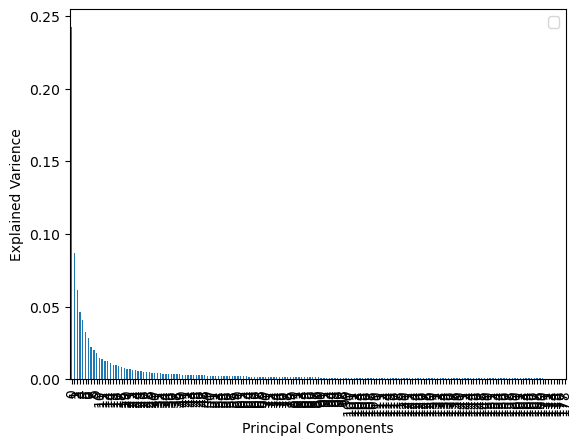

In [14]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [7]:
algorithms = [
    #{'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [3, 5, 7]}},
    #{'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4, 5], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300]}},
    {'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5,0.75, 1.0]}},
    #{'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [10,20,30,35], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10]}},
    #{'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [10,20,30,35], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    #{'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [10,20,30,35], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    #{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9]}}
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results_test = run_parallel(algorithms)
results_df_test = pd.DataFrame(results_test)

ValueError: Number of labels is 7797. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
results_df_test

In [ ]:
results_df=pd.read_csv('clustering_results_isolet.csv')
results_df=pd.concat([results_df, results_df_test], ignore_index=True)
results_df.to_csv('clustering_results_isolet.csv', index=False) 
results_df

nursery

In [32]:
nursery = openml.datasets.get_dataset(26)
X, y, categorical_indicator, attribute_names = nursery.get_data(target=nursery.default_target_attribute)


In [33]:
y

0         recommend
1          priority
2         not_recom
3         recommend
4          priority
            ...    
12955    spec_prior
12956     not_recom
12957    spec_prior
12958    spec_prior
12959     not_recom
Name: class, Length: 12960, dtype: category
Categories (5, object): ['not_recom' < 'recommend' < 'very_recom' < 'priority' < 'spec_prior']

In [23]:
for col in X:
  print(X[col].unique())

['usual', 'pretentious', 'great_pret']
Categories (3, object): ['usual' < 'pretentious' < 'great_pret']
['proper', 'less_proper', 'improper', 'critical', 'very_crit']
Categories (5, object): ['proper' < 'less_proper' < 'improper' < 'critical' < 'very_crit']
['complete', 'completed', 'incomplete', 'foster']
Categories (4, object): ['complete' < 'completed' < 'incomplete' < 'foster']
['1', '2', '3', 'more']
Categories (4, object): ['1' < '2' < '3' < 'more']
['convenient', 'less_conv', 'critical']
Categories (3, object): ['convenient' < 'less_conv' < 'critical']
['convenient', 'inconv']
Categories (2, object): ['convenient' < 'inconv']
['nonprob', 'slightly_prob', 'problematic']
Categories (3, object): ['nonprob' < 'slightly_prob' < 'problematic']
['recommended', 'priority', 'not_recom']
Categories (3, object): ['recommended' < 'priority' < 'not_recom']


In [34]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_features = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health']
enc = OrdinalEncoder(categories=[['usual', 'pretentious', 'great_pret'],
                                 ['proper', 'less_proper', 'improper', 'critical', 'very_crit'],
                                 ['complete', 'completed', 'incomplete', 'foster'],
                                 ['1', '2', '3', 'more'],
                                 ['convenient', 'less_conv', 'critical'],
                                 ['convenient', 'inconv'],
                                 ['nonprob', 'slightly_prob', 'problematic'],
                                 ['recommended', 'priority', 'not_recom']])
X[ordinal_features] = enc.fit_transform(X[ordinal_features])
y = le.fit_transform(y)

In [42]:
algorithms = [
    {'name': 'KMeans', 'class': KMeans, 'param_grid': {'n_clusters': [ 3, 4,5,6,7], 'init': ['k-means++', 'random'], 'max_iter': [100, 300, 500]}},
    #{'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    {'name': 'DBSCAN', 'class': DBSCAN, 'param_grid': {'eps': [0.5, 1.0, 1.5], 'min_samples': [ 5, 7,9,12]}},
    #{'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [3, 5, 7], 'xi': [0.01, 0.05, 0.1]}},
    #{'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    #{'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5], 'cluster_all': [True, False]}},
    #{'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [2, 3, 4], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    #{'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [2, 3, 4], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    #{'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    #{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'max_iter': [100, 200, 300]}}
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results = run_parallel(algorithms)
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results_nursery.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.292522,0.091479,0.149013,0.718808
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.316924,0.066213,0.130700,0.796930
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.193365,0.063671,0.131368,0.703178
3,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.130966,0.054372,0.134238,2.024232
4,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.155765,0.049715,0.129769,1.613164
5,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.248330,0.100441,0.149013,1.322056
6,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.201921,0.067942,0.140643,1.059624
7,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.204380,0.062963,0.130126,1.434239
8,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.170634,0.053827,0.134170,1.010831
9,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.180483,0.047016,0.131237,0.875060


In [39]:
algorithms = [
    {'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [5, 7,9], 'xi': [0.01, 0.05, 0.1]}},
    #{'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    #{'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    {'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 0.75, 1.0]}},
    #{'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    #{'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    #{'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    #{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9]}}
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results_test = run_parallel(algorithms)
results_df_test = pd.DataFrame(results_test)

ValueError: Number of labels is 12960. Valid values are 2 to n_samples - 1 (inclusive)

In [45]:
results_df=pd.read_csv('clustering_results_nursery.csv')
results_df=pd.concat([results_df, results_df_test], ignore_index=True)
results_df.to_csv('clustering_results_nursery.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.292522,0.091479,0.149013,0.718808
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.316924,0.066213,0.130700,0.796930
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.193365,0.063671,0.131368,0.703178
3,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.130966,0.054372,0.134238,2.024232
4,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.155765,0.049715,0.129769,1.613164
...,...,...,...,...,...,...
112,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.186218,0.101448,0.129051,24.091179
113,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.267972,0.079992,0.119427,20.896759
114,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.296640,0.078970,0.108157,21.522001
115,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.168812,0.072843,0.100495,24.675328


gas-drift-different-concentrations

In [8]:
gasdrift = openml.datasets.get_dataset(1477)
X, y, categorical_indicator, attribute_names = gasdrift.get_data(target=gasdrift.default_target_attribute)

In [9]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129
0,12285.6582,4.076635,4.842317,7.509393,10.822436,-1.312657,-1.853717,-6.924985,11800.9233,4.483500,...,-3.440387,1784.5324,1.907000,1.729200,4.881194,8.623828,-0.314110,-0.661556,-3.521663,10.0
1,-35.6889,0.993944,0.166099,0.489363,3.484663,-0.130298,-0.528364,-3.735347,266.4145,1.053988,...,-4.482534,904.9898,1.433707,1.068069,2.532958,5.369720,-0.183779,-0.534087,-4.635975,50.0
2,63927.2217,14.956941,19.971376,29.188512,33.291320,-10.433776,-16.062245,-49.490143,57405.8483,15.613843,...,-25.150090,14585.7879,8.189021,6.099452,12.127991,15.709651,-3.887082,-6.731473,-19.326895,250.0
3,2992.9019,1.380553,0.808910,1.288259,4.660135,-0.755903,-1.120470,-4.075213,4301.4033,1.652701,...,-7.215792,6044.5554,3.488295,2.662288,5.938297,8.544508,-1.567322,-2.701235,-6.472439,600.0
4,57524.7812,11.912566,14.631496,19.809240,23.715868,-9.084750,-11.770585,-39.234003,50051.0703,11.732548,...,-10.248794,10580.1006,5.752675,3.880740,8.545897,11.831716,-2.655521,-4.312744,-8.510591,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13905,13384.8262,2.820931,4.007378,6.618008,11.386095,-2.142994,-3.110327,-11.296786,19013.4575,4.050907,...,-8.012662,7548.3501,2.377836,3.400734,8.571174,11.555882,-1.617656,-2.457614,-6.226359,10.0
13906,13382.9619,2.825174,4.010915,6.483989,10.356127,-2.156512,-3.179563,-10.184803,19034.2495,4.066463,...,-6.943002,7510.4946,2.364505,3.401381,8.512949,12.149638,-1.613554,-2.493870,-6.859804,10.0
13907,13336.8725,2.822288,3.980818,6.487103,10.936979,-2.146688,-3.273109,-11.067489,18997.7222,4.055524,...,-7.777268,7530.0010,2.369898,3.400592,8.494436,11.839013,-1.612525,-2.504918,-6.263872,10.0
13908,13351.1318,2.824358,3.987819,6.554427,11.331002,-2.143651,-3.257854,-11.795109,19035.9926,4.071607,...,-6.890286,7599.0201,2.391834,3.358804,8.457260,11.297346,-1.606879,-2.438701,-6.044784,10.0


In [10]:
X = scaler.fit_transform(X)
y = le.fit_transform(y)

In [27]:
algorithms = [
    {'name': 'KMeans', 'class': KMeans, 'param_grid': {'n_clusters': [ 3, 4,5,6,7], 'init': ['k-means++', 'random'], 'max_iter': [100, 300, 500]}},
    #{'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    {'name': 'DBSCAN', 'class': DBSCAN, 'param_grid': {'eps': [0.5, 1.0, 1.5], 'min_samples': [ 5, 7,9,12]}},
    #{'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [3, 5, 7], 'xi': [0.01, 0.05, 0.1]}},
    #{'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    #{'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5], 'cluster_all': [True, False]}},
    #{'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [2, 3, 4], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    #{'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [2, 3, 4], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    #{'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    #{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'max_iter': [100, 200, 300]}}
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results = run_parallel(algorithms)
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results_gas-drift-different-concentrations.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.054097,0.033598,0.425760,2.826405
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.122173,0.060306,0.313437,2.311292
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.213043,0.080008,0.338998,3.462056
3,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.099140,0.060097,0.280078,5.479806
4,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.064159,0.067602,0.289693,3.792276
5,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.054097,0.033598,0.425760,2.997726
6,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.090835,0.049558,0.313911,2.235829
7,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.123098,0.080244,0.338877,4.656995
8,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.209457,0.060097,0.280078,5.213085
9,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.191127,0.055554,0.287013,6.725141


In [ ]:
algorithms = [
    #{'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [5, 7,9,12], 'xi': [0.01, 0.05, 0.1]}},
    #{'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    {'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    #{'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5]}},
    #{'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    {'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    {'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    #{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'max_iter': [100, 200, 300]}}
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results_test = run_parallel(algorithms)
results_df_test = pd.DataFrame(results_test)


In [11]:
pca=PCA(0.95)
X=pca.fit_transform(X)


In [82]:
y

array([3, 2, 3, ..., 5, 5, 5])

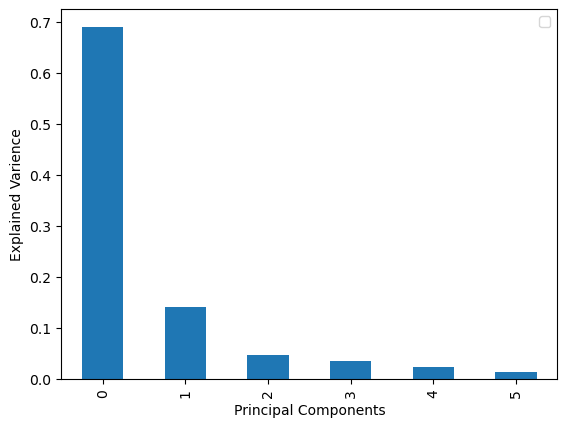

In [12]:
pca.n_components_
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [ ]:
algorithms = [
    #{'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [5, 7,9,12], 'xi': [0.01, 0.05, 0.1]}},
    #{'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    #{'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    #{'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5]}},
    {'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'affinity': ['rbf'], 'gamma': [0.1, 1, 10, 100]}},
    #{'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    #{'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [3, 4,5,6,7], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    #{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'max_iter': [100, 200, 300]}}
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results_test = run_parallel(algorithms)
results_df_test = pd.DataFrame(results_test)


In [ ]:
results_df_test

In [ ]:
results_df=pd.read_csv('clustering_results_gas-drift-different-concentrations.csv')
results_df=pd.concat([results_df, results_df_test], ignore_index=True)
results_df.to_csv('clustering_results_gas-drift-different-concentrations.csv', index=False) 
results_df

MagicTelescope

In [11]:
magictelescope = openml.datasets.get_dataset(1120)
X, y, categorical_indicator, attribute_names = magictelescope.get_data(target=magictelescope.default_target_attribute)
X = scaler.fit_transform(X)
y = le.fit_transform(y)

In [26]:
algorithms = [
    {'name': 'KMeans', 'class': KMeans, 'param_grid': {'n_clusters': [2, 3, 4], 'init': ['k-means++', 'random'], 'max_iter': [100, 300, 500]}},
    #{'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    {'name': 'DBSCAN', 'class': DBSCAN, 'param_grid': {'eps': [0.5, 1.0, 1.5], 'min_samples': [3, 5, 7]}},
    #{'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [3, 5, 7], 'xi': [0.01, 0.05, 0.1]}},
    #{'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    #{'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5], 'cluster_all': [True, False]}},
    #{'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [2, 3, 4], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    #{'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [2, 3, 4], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    #{'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    #{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'max_iter': [100, 200, 300]}}
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results = run_parallel(algorithms)
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results_MagicTelescope.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.419946,0.030641,0.318080,1.203304
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.573619,0.089480,0.292159,1.218934
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.389995,0.124528,0.297080,0.941666
3,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.419815,0.030702,0.318110,0.515705
4,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.424934,0.089480,0.292159,0.951889
5,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.458175,0.124328,0.297039,0.971600
6,KMeans,"{'init': 'k-means++', 'max_iter': 500, 'n_clus...",0.598888,0.031789,0.318394,0.562585
7,KMeans,"{'init': 'k-means++', 'max_iter': 500, 'n_clus...",0.217491,0.089480,0.292159,1.188869
8,KMeans,"{'init': 'k-means++', 'max_iter': 500, 'n_clus...",0.388878,0.124862,0.297320,0.982883
9,KMeans,"{'init': 'random', 'max_iter': 100, 'n_cluster...",0.418257,0.031576,0.318473,0.790881


In [ ]:
algorithms = [
    {'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [3, 5, 7], 'xi': [0.01, 0.05, 0.1]}},
    #{'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    #{'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    #{'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5]}},
    {'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [2, 3, 4], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    #{'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [2, 3, 4], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    #{'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    #{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'max_iter': [100, 200, 300]}}
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results_test = run_parallel(algorithms)
results_df_test = pd.DataFrame(results_test)


In [9]:
results_df_test

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,Birch,"{'branching_factor': 20, 'n_clusters': 2, 'thr...",0.607158,0.085451,0.373668,7.155533
1,Birch,"{'branching_factor': 20, 'n_clusters': 2, 'thr...",0.371201,0.061935,0.329591,1.203655
2,Birch,"{'branching_factor': 20, 'n_clusters': 3, 'thr...",0.602123,0.208577,0.311366,7.989457
3,Birch,"{'branching_factor': 20, 'n_clusters': 3, 'thr...",0.631834,0.061935,0.329591,0.953266
4,Birch,"{'branching_factor': 20, 'n_clusters': 4, 'thr...",0.243713,0.098066,0.233556,6.126920
5,Birch,"{'branching_factor': 20, 'n_clusters': 4, 'thr...",0.631834,0.061935,0.329591,1.080737
6,Birch,"{'branching_factor': 50, 'n_clusters': 2, 'thr...",0.720537,0.212479,0.244196,6.717854
7,Birch,"{'branching_factor': 50, 'n_clusters': 2, 'thr...",0.371201,0.061935,0.329591,2.240638
8,Birch,"{'branching_factor': 50, 'n_clusters': 3, 'thr...",0.156159,0.132017,0.299060,4.500657
9,Birch,"{'branching_factor': 50, 'n_clusters': 3, 'thr...",0.631834,0.061935,0.329591,0.953266


In [10]:
#results_df=pd.read_csv('clustering_results_MagicTelescope.csv')
results_df=pd.concat([results_df, results_df_test], ignore_index=True)
results_df.to_csv('clustering_results_MagicTelescope.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.419946,0.030641,0.318080,1.203304
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.573619,0.089480,0.292159,1.218934
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.389995,0.124528,0.297080,0.941666
3,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.419815,0.030702,0.318110,0.515705
4,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.424934,0.089480,0.292159,0.951889
...,...,...,...,...,...,...
74,Birch,"{'branching_factor': 100, 'n_clusters': 4, 'th...",0.631834,0.061935,0.329591,1.101094
75,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.497792,0.000092,0.283314,219.737399
76,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.517578,0.045846,0.259542,196.648028
77,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.230720,0.089493,0.277987,132.059128


Letter

In [14]:
letter = openml.datasets.get_dataset(6)
X, y, categorical_indicator, attribute_names = letter.get_data(target=letter.default_target_attribute)
X = scaler.fit_transform(X)
y = le.fit_transform(y)

In [12]:
y

array([25, 15, 18, ..., 14, 11, 16])

In [13]:
algorithms = [
    {'name': 'KMeans', 'class': KMeans, 'param_grid': {'n_clusters': [5, 10,15,20,25], 'init': ['k-means++', 'random'], 'max_iter': [100, 300, 500]}},
    #{'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    {'name': 'DBSCAN', 'class': DBSCAN, 'param_grid': {'eps': [0.5, 1.0, 1.5]}},
    #{'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [3, 5, 7], 'xi': [0.01, 0.05, 0.1]}},
    #{'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    #{'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5], 'cluster_all': [True, False]}},
    #{'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [2, 3, 4], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15]}},
    #{'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [2, 3, 4], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    #{'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [2, 3, 4, 5], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    #{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'max_iter': [100, 200, 300]}}
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results = run_parallel(algorithms)
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results_letter.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.013316,0.042302,0.140649,1.657668
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.030363,0.070626,0.152299,3.476587
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.029066,0.101880,0.152406,4.464057
3,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.027914,0.113247,0.139732,5.167371
4,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.027550,0.126599,0.149781,6.103306
5,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.011942,0.042291,0.140643,2.638170
6,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.024310,0.070821,0.152425,3.136374
7,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.014743,0.102449,0.147063,4.807903
8,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.035524,0.115299,0.139261,7.192883
9,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.021604,0.132173,0.147661,7.584449


In [ ]:
algorithms = [
    #{'name': 'OPTICS', 'class': OPTICS, 'param_grid': {'min_samples': [10, 20, 30,40,50]}},
    {'name': 'AgglomerativeClustering', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [5, 10, 15, 20, 25, 30], 'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': ['complete', 'average']}},
    #{'name': 'GaussianMixture', 'class': GaussianMixture, 'param_grid': {'n_components': [2, 3, 4], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'max_iter': [100, 300, 500]}},
    #{'name': 'MeanShift', 'class': MeanShift, 'param_grid': {'bandwidth': [0.5, 1.0, 1.5]}},
    #{'name': 'SpectralClustering', 'class': SpectralClustering, 'param_grid': {'n_clusters': [2, 3, 4,5, 10, 15, 20, 25], 'affinity': ['nearest_neighbors', 'rbf'], 'n_neighbors': [5, 10, 15,20]}},
    #{'name': 'Birch', 'class': Birch, 'param_grid': {'n_clusters': [5, 10,15,20,25], 'threshold': [0.1, 0.5, 1.0], 'branching_factor': [20, 50, 100]}},
    #{'name': 'Ward', 'class': AgglomerativeClustering, 'param_grid': {'n_clusters': [5, 10,15,20,25], 'affinity': ['euclidean'], 'linkage': ['ward']}},
    #{'name': 'AffinityPropagation', 'class': AffinityPropagation, 'param_grid': {'damping': [0.5, 0.7, 0.9], 'max_iter': [100, 200, 300]}}
]

run_parallel(algorithms)

# Run all the algorithms in parallel and save the results to a CSV file
results_test = run_parallel(algorithms)
results_df_test = pd.DataFrame(results_test)


In [11]:
results_df_test

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.010655,0.054671,0.094759,69.190319
1,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.022636,0.087367,0.102931,68.643287
2,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.006177,0.121574,0.107534,69.410315
3,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.020935,0.133515,0.096462,68.067957
4,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.065141,0.143786,0.112374,68.257344


In [12]:
#results_df=pd.read_csv('clustering_results_letter.csv')
results_df=pd.concat([results_df, results_df_test], ignore_index=True)
results_df.to_csv('clustering_results_letter.csv', index=False) 
results_df

,Algorithm,Parameters,F1 Score,Adjusted Rand Score,Silhouette Score,Execution Time
0,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.013316,0.042302,0.140649,1.657668
1,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.030363,0.070626,0.152299,3.476587
2,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.029066,0.101880,0.152406,4.464057
3,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.027914,0.113247,0.139732,5.167371
4,KMeans,"{'init': 'k-means++', 'max_iter': 100, 'n_clus...",0.027550,0.126599,0.149781,6.103306
...,...,...,...,...,...,...
101,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.010655,0.054671,0.094759,69.190319
102,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.022636,0.087367,0.102931,68.643287
103,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.006177,0.121574,0.107534,69.410315
104,Ward,"{'affinity': 'euclidean', 'linkage': 'ward', '...",0.020935,0.133515,0.096462,68.067957


Covertype

In [61]:
covertype = openml.datasets.get_dataset(150)
X, y, categorical_indicator, attribute_names = covertype.get_data(target=covertype.default_target_attribute)

In [62]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0,0,0,0,0,0,0,0,0,0
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0,0,0,0,0,0,0,0,0,0
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,0
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,0
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.425000,0.303030,0.060845,0.245478,0.015175,0.944882,0.933071,0.464567,0.116688,...,0,0,0,0,0,0,0,0,0,0
581008,0.266133,0.422222,0.287879,0.047960,0.239018,0.013348,0.944882,0.933071,0.468504,0.117803,...,0,0,0,0,0,0,0,0,0,0
581009,0.263632,0.441667,0.257576,0.042949,0.232558,0.012646,0.929134,0.948819,0.511811,0.119058,...,0,0,0,0,0,0,0,0,0,0
581010,0.262631,0.472222,0.227273,0.042949,0.229974,0.012646,0.905512,0.964567,0.562992,0.120452,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X = scaler.fit_transform(X)
y = le.fit_transform(y)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0,0,0,0,0,0,0,0,0,0
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0,0,0,0,0,0,0,0,0,0
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,0
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,0
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.425000,0.303030,0.060845,0.245478,0.015175,0.944882,0.933071,0.464567,0.116688,...,0,0,0,0,0,0,0,0,0,0
581008,0.266133,0.422222,0.287879,0.047960,0.239018,0.013348,0.944882,0.933071,0.468504,0.117803,...,0,0,0,0,0,0,0,0,0,0
581009,0.263632,0.441667,0.257576,0.042949,0.232558,0.012646,0.929134,0.948819,0.511811,0.119058,...,0,0,0,0,0,0,0,0,0,0
581010,0.262631,0.472222,0.227273,0.042949,0.229974,0.012646,0.905512,0.964567,0.562992,0.120452,...,0,0,0,0,0,0,0,0,0,0


Visulizations